In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import io

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/sahil-gidwani/ML/main/dataset/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Drop the Columns which are unique for all users
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [5]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.shape

(10000, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


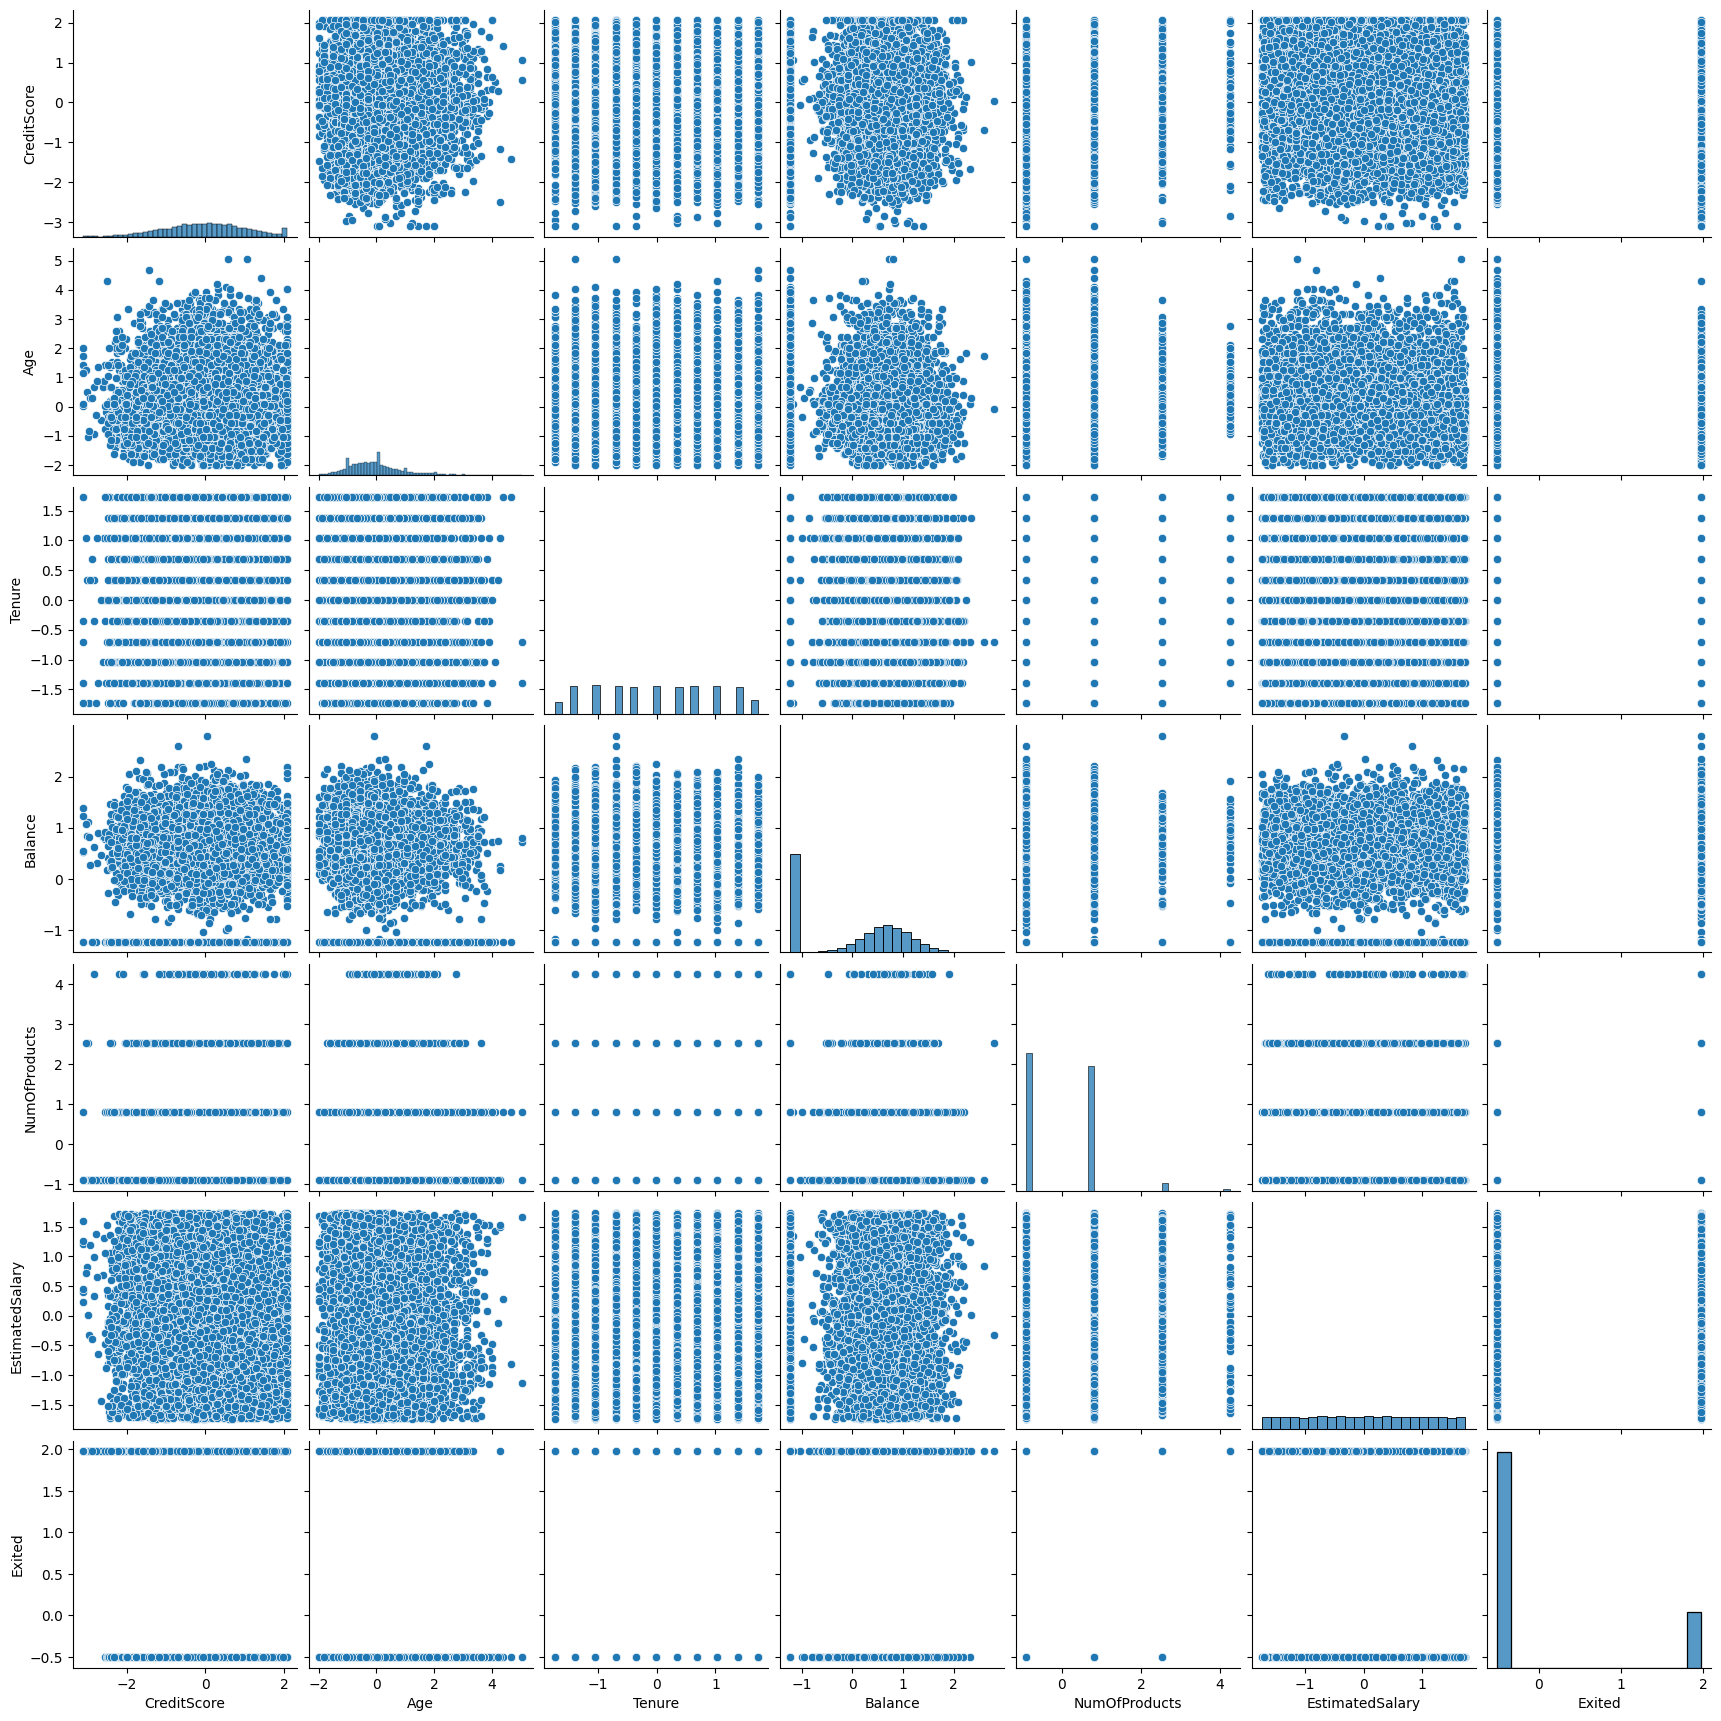

In [9]:
# Before performing Bivariate analysis, Lets bring all the features to the same range
# Scale the data
scaler = StandardScaler()
# Extract only the Numerical Columns to perform Bivariate Analysis
subset = df.drop(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], axis = 1)
scaled = scaler.fit_transform(subset)
scaled_df = pd.DataFrame(scaled, columns = subset.columns)
sns.pairplot(scaled_df)

<Axes: >

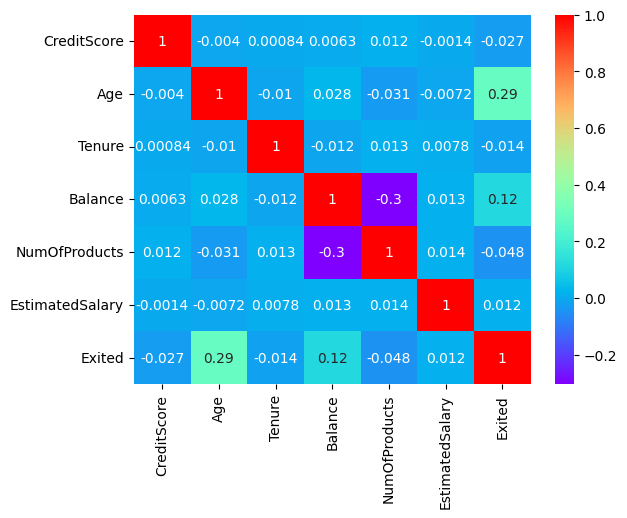

In [10]:
sns.heatmap(scaled_df.corr(), annot = True, cmap = 'rainbow')

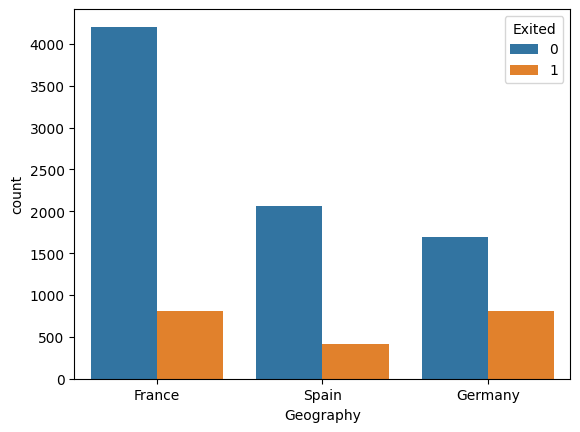

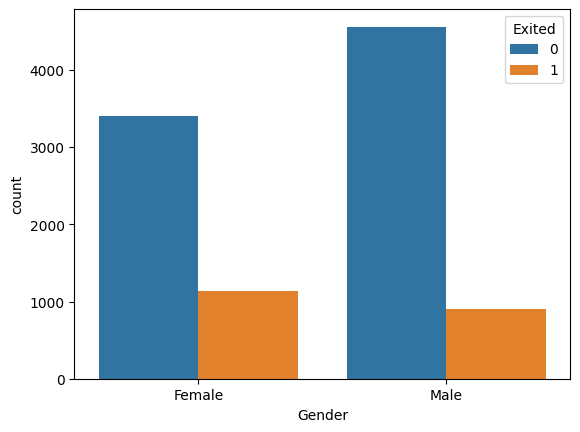

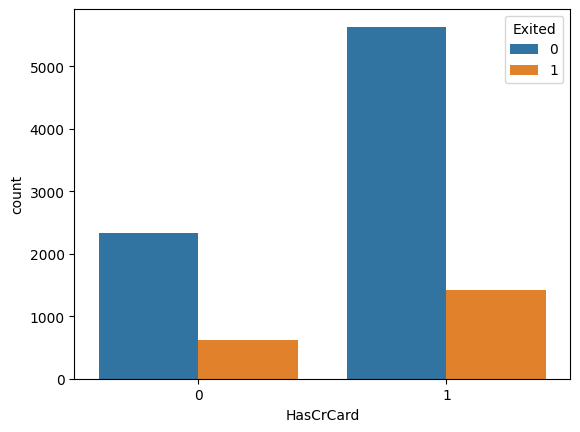

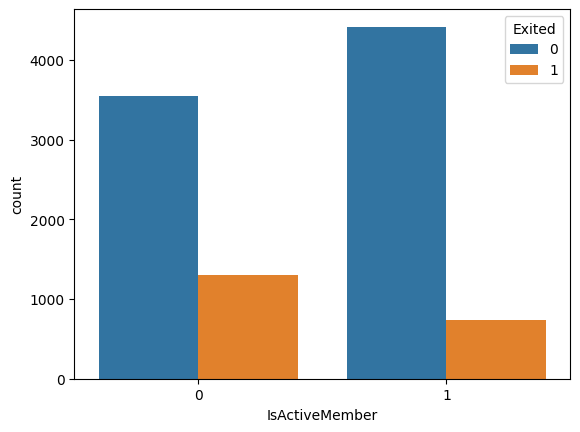

In [11]:
# From the above plots, We can see that there is no significant Linear relationship between the features
# Categorical Features vs Target Variable
sns.countplot(x = 'Geography', data = df, hue = 'Exited')
plt.show()
sns.countplot(x = 'Gender', data = df, hue = 'Exited')
plt.show()
sns.countplot(x = 'HasCrCard', data = df, hue = 'Exited')
plt.show()
sns.countplot(x = 'IsActiveMember', data = df, hue = 'Exited')
plt.show()

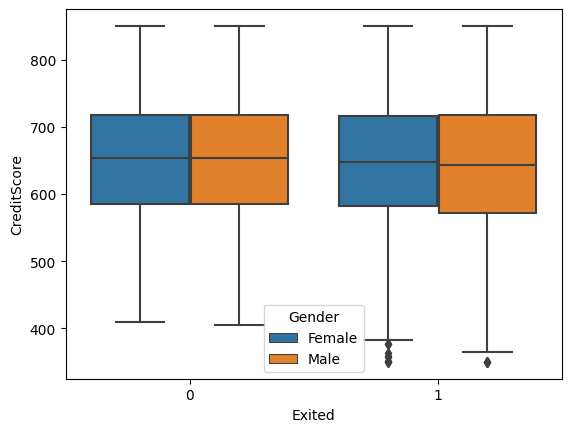

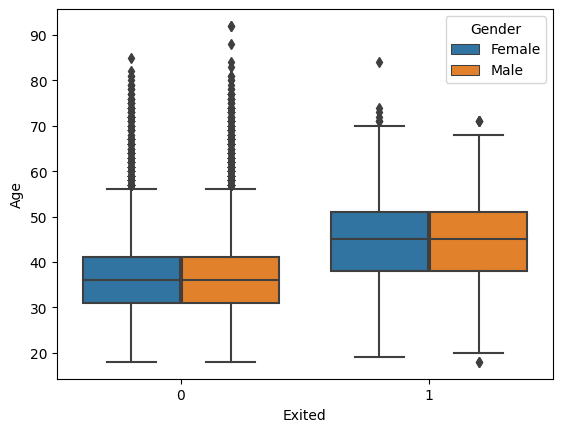

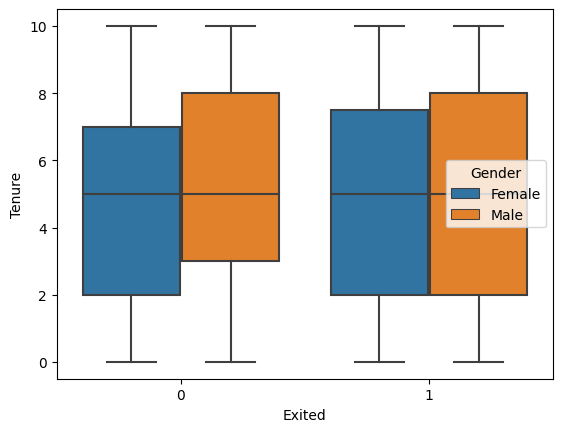

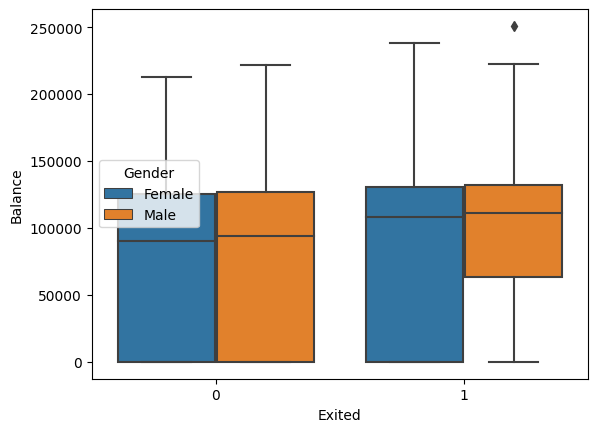

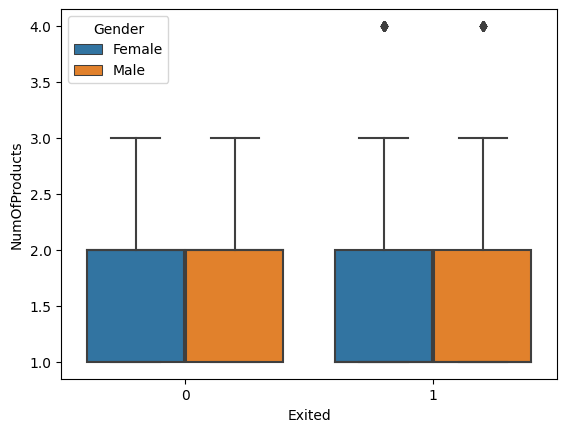

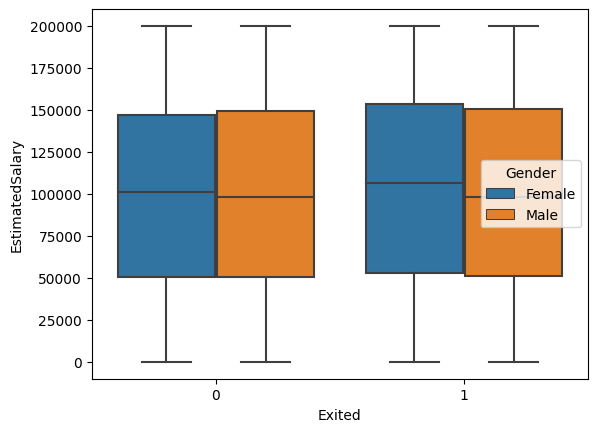

In [12]:
# Analysing the Numerical Features relationship with the Target variable. Here 'Exited' is the Target Feature
subset = subset.drop('Exited', axis = 1)
for i in subset.columns:
  sns.boxplot(x = df['Exited'], y = df[i], hue = df['Gender'])
  plt.show()

In [13]:
# Insights from Bivariate Plots
# 1. The Avg Credit Score seem to be almost the same for Active and Churned customers
# 2. Young People seem to stick to the bank compared to older people
# 3. The Average Bank Balance is high for Churned Customers
# 4. The churning rate is high with German Customers
# 5. The Churning rate is high among the Non-Active Members

In [14]:
# 2. Distinguish the Target and Feature Set and divide the dataset into Training and Test sets

X = df.drop('Exited', axis = 1)
Y = df.pop('Exited')

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.10)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.10)

print("X_train size is {}".format(X_train.shape[0]))
print("X_val size is {}".format(X_val.shape[0]))
print("X_test size is {}".format(X_test.shape[0]))

X_train size is 8100
X_val size is 900
X_test size is 1000


In [16]:
# 3. Standardising the train, Val and Test data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

num_subset = scaler.fit_transform(X_train[num_cols])
X_train_num_df = pd.DataFrame(num_subset, columns = num_cols)
X_train_num_df['Geography'] = list(X_train['Geography'])
X_train_num_df['Gender'] = list(X_train['Gender'])
X_train_num_df['HasCrCard'] = list(X_train['HasCrCard'])
X_train_num_df['IsActiveMember'] = list(X_train['IsActiveMember'])

# Standardise the Validation data
num_subset = scaler.fit_transform(X_val[num_cols])
X_val_num_df = pd.DataFrame(num_subset, columns = num_cols)
X_val_num_df['Geography'] = list(X_val['Geography'])
X_val_num_df['Gender'] = list(X_val['Gender'])
X_val_num_df['HasCrCard'] = list(X_val['HasCrCard'])
X_val_num_df['IsActiveMember'] = list(X_val['IsActiveMember'])

# Standardise the Test data
num_subset = scaler.fit_transform(X_test[num_cols])
X_test_num_df=pd.DataFrame(num_subset, columns = num_cols)
X_test_num_df['Geography'] = list(X_test['Geography'])
X_test_num_df['Gender'] = list(X_test['Gender'])
X_test_num_df['HasCrCard'] = list(X_test['HasCrCard'])
X_test_num_df['IsActiveMember'] = list(X_test['IsActiveMember'])

In [17]:
# Convert the categorical features to numerical
# pd.get_dummies() returns a new DataFrame with binary columns for each category in the specified column, where each column represents the presence (1) or absence (0) of a specific category.
X_train_num_df = pd.get_dummies(X_train_num_df, columns=['Geography', 'Gender'])
X_test_num_df = pd.get_dummies(X_test_num_df, columns=['Geography', 'Gender'])
X_val_num_df = pd.get_dummies(X_val_num_df, columns=['Geography', 'Gender'])

In [18]:
# 4. Initialise and build the Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(7, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 1. **Sequential Model**: The `Sequential` model in Keras is a linear stack of layers. In this case, you're building a sequential neural network where layers are added in a sequential order.

# 2. **Input Layer**: In your model, there is no explicit input layer defined. The input to the model is assumed to have features (input dimensions) that match the input size of the first Dense layer. So, the first Dense layer effectively serves as the input layer.

# 3. **First Hidden Layer**:
#    - Type: Dense Layer
#    - Number of Neurons (Units): 7
#    - Activation Function: ReLU (Rectified Linear Activation)
#    - Explanation: This is the first hidden layer. It has 7 neurons, and the ReLU activation function is applied to the output of each neuron. The ReLU activation is commonly used in hidden layers to introduce non-linearity into the model.

# 4. **Second Hidden Layer**:
#    - Type: Dense Layer
#    - Number of Neurons (Units): 10
#    - Activation Function: ReLU (Rectified Linear Activation)
#    - Explanation: This is the second hidden layer. It contains 10 neurons, and each neuron applies the ReLU activation function. The purpose of having multiple hidden layers is to capture complex patterns and representations in the data.

# 5. **Output Layer**:
#    - Type: Dense Layer
#    - Number of Neurons (Units): 1
#    - Activation Function: Sigmoid
#    - Explanation: This is the output layer of the neural network. It has 1 neuron, which is suitable for binary classification tasks. The sigmoid activation function squashes the output into the range [0, 1] and is commonly used in binary classification to predict probabilities.

# In summary, this model architecture is for a feedforward neural network with one input layer (implicitly defined), two hidden layers with ReLU activation, and one output layer with a sigmoid activation. The model is designed for binary classification tasks where it takes a set of features as input and predicts a binary outcome (0 or 1) with associated probabilities.

In [19]:
# Identify the points of improvement and implement the same

import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(0.01)
model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

# The optimizer you've chosen is `Adam`, which is a popular optimization algorithm. The specific variant of Adam you're using has a learning rate of 0.01 (as specified by `0.01`).

# The primary goal of optimization in a neural network is to minimize the loss function. In your case:

# - `loss = 'binary_crossentropy'`: This indicates that you are using binary cross-entropy loss, which is commonly used for binary classification problems. The binary cross-entropy loss measures the dissimilarity between the true binary labels and the predicted probabilities.

# - `optimizer = optimizer`: You've chosen the Adam optimizer, which is responsible for updating the model's weights during training to minimize the specified loss function.

# - `metrics = ['accuracy']`: This specifies that you want to track and report the classification accuracy of your model during training. Accuracy is a common metric used to evaluate classification models and represents the percentage of correctly classified instances.

# So, the optimization process with the Adam optimizer aims to minimize the binary cross-entropy loss, and it does so by adjusting the weights of your neural network. The goal is to improve the model's accuracy in correctly classifying instances in your binary classification problem.

In [20]:
# - epochs = 100: The number of epochs specifies how many times your model will iterate through the entire training dataset during the training process. In this case, you're training for 100 epochs, meaning the model will see the training data 100 times to learn and improve.
# - batch_size = 10: The batch size determines how many training examples are used in each update of the model's weights during each iteration (or epoch). A batch size of 10 means that the model will perform an update using 10 training examples at a time. Batch training is used to speed up the training process and may also have regularization effects.
# - verbose = 1: The verbose argument controls what type of information is displayed during training. Setting it to 1 means you'll see a progress bar that shows the training progress for each epoch. If you set it to 0, you'll train silently, and if you set it to 2, you'll get one line per epoch.
model.fit(X_train_num_df, Y_train, epochs = 100, batch_size = 10, verbose = 1)

Epoch 1/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3907 - accuracy: 0.8367
Epoch 2/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3591 - accuracy: 0.8507
Epoch 3/100
810/810 [==============================] - 2s 3ms/step - loss: 0.3539 - accuracy: 0.8540
Epoch 4/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3536 - accuracy: 0.8568
Epoch 5/100
810/810 [==============================] - 3s 4ms/step - loss: 0.3495 - accuracy: 0.8560
Epoch 6/100
810/810 [==============================] - 3s 3ms/step - loss: 0.3497 - accuracy: 0.8547
Epoch 7/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3482 - accuracy: 0.8580
Epoch 8/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3486 - accuracy: 0.8542
Epoch 9/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3482 - accuracy: 0.8589
Epoch 10/100
810/810 [==============================] - 2s 2ms/step - loss: 0.3455 - accura

In [21]:
# Predict the Results using 0.5 threshold
Y_pred_val = model.predict(X_val_num_df)
Y_pred_val[Y_pred_val > 0.5] = 1
Y_pred_val[Y_pred_val < 0.5] = 0

29/29 [==============================] - 0s 1ms/step


In [22]:
Y_pred_val = Y_pred_val.tolist()
X_compare_val = X_val.copy()
X_compare_val['Y_actual'] = Y_val
X_compare_val['Y_pred'] = Y_pred_val
X_compare_val.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Y_actual,Y_pred
2468,700,France,Male,38,9,65962.63,1,1,1,100950.48,0,[0.0]
5880,537,France,Male,28,0,88963.31,2,1,1,189839.93,0,[0.0]
276,756,France,Male,62,3,0.00,1,1,1,11199.04,1,[0.0]
5237,554,Spain,Male,26,8,149134.46,1,1,1,177966.24,0,[0.0]
4441,624,France,Female,38,3,0.00,2,1,1,163666.85,0,[0.0]
205,550,France,Male,37,3,0.00,1,1,1,179670.31,0,[0.0]
8862,813,Germany,Male,59,2,135078.41,1,1,0,187636.06,1,[1.0]
3071,798,France,Male,32,7,0.00,2,0,1,37731.95,0,[0.0]
5440,690,Germany,Male,43,2,166522.78,1,0,0,119644.59,1,[0.0]
8004,615,France,Male,45,5,0.00,2,1,1,164886.64,0,[0.0]


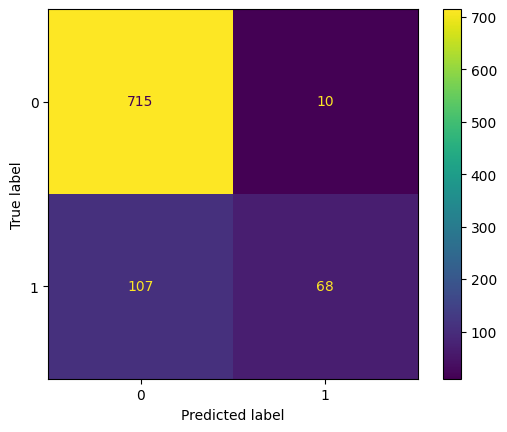

In [24]:
# Confusion Matrix of the Validation set
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_val = confusion_matrix(Y_val, Y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val)
disp.plot()

In [25]:
# Extract TP, TN, FP, FN from the confusion matrix
TP = cm_val[1, 1]  # True Positives
TN = cm_val[0, 0]  # True Negatives
FP = cm_val[0, 1]  # False Positives
FN = cm_val[1, 0]  # False Negatives

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Accuracy:", accuracy)

Accuracy: 0.87


In [26]:
loss1, accuracy1 = model.evaluate(X_train_num_df, Y_train, verbose=False)
loss2, accuracy2 = model.evaluate(X_val_num_df, Y_val, verbose=False)
print("Train Loss {}".format(loss1))
print("Train Accuracy {}".format(accuracy1))
print("Val Loss {}".format(loss2))
print("Val Accuracy {}".format(accuracy2))

Train Loss 0.32748791575431824
Train Accuracy 0.8649382591247559
Val Loss 0.32911568880081177
Val Accuracy 0.8700000047683716


32/32 [==============================] - 0s 4ms/step


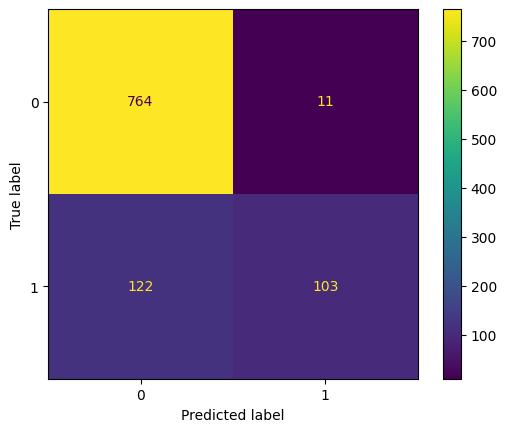

In [27]:
# Since our Training Accuracy and Validation Accuracy are pretty close, we can conclude that our model generalises well. So, lets apply the model on the Test set and make predictions and evaluate the model against the Test.
from sklearn import metrics
Y_pred_test = model.predict(X_test_num_df)
Y_pred_test[Y_pred_test > 0.5] = 1
Y_pred_test[Y_pred_test < 0.5] = 0
cm_test = metrics.confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()

In [28]:
loss3, accuracy3 = model.evaluate(X_test_num_df, Y_test, verbose=False)
print("Test Accuracy is {}".format(accuracy3))
print("Test loss is {}".format(loss3))

Test Accuracy is 0.8669999837875366
Test loss is 0.34361717104911804
